In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style="whitegrid")
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [178]:
train = pd.read_csv('/Users/Mitch/Documents/DATA SCIENCE/Self Learning Not School/KaggleData/Housing/train.csv')

In [179]:
test = pd.read_csv('/Users/Mitch/Documents/DATA SCIENCE/Self Learning Not School/KaggleData/Housing/test.csv')

In [180]:
train.shape

(1460, 81)

In [181]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [183]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Fix some of the variable types

In [184]:
train['YrSold'] = train['YrSold'].astype('category')
train['MoSold'] = train['MoSold'].astype('category')

# EDA

In [185]:
# Target variable counts EDA
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

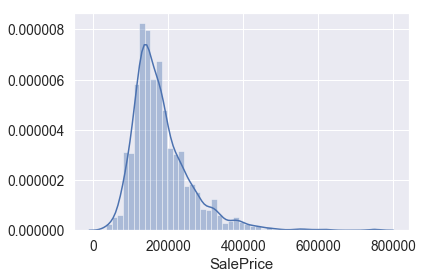

In [186]:
# Target variabe distribution EDA
sns.distplot(train.SalePrice)

### Looks skewed and kurtosis looks off

In [187]:
print("Skewness: %f" % train.SalePrice.skew())
print("Kurtosis: %f" % train.SalePrice.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Check scatterplots against target variable

(-0.5, 9.5, 0, 800000)

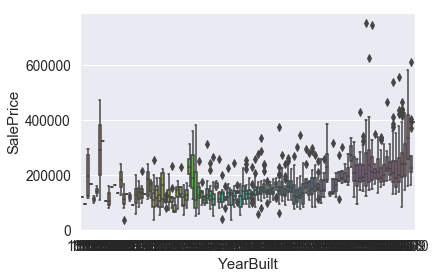

In [188]:
# Year Built
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
sns.boxplot(x=var, y='SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)

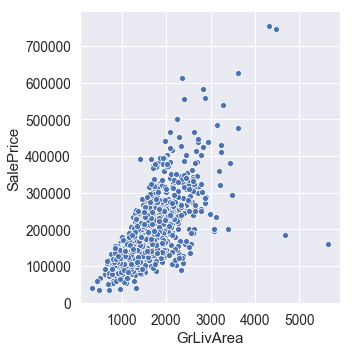

In [189]:
# Square Footabe above Ground
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
sns.relplot(x=var, y='SalePrice', data = data)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000), type = ) # Instead of SNS

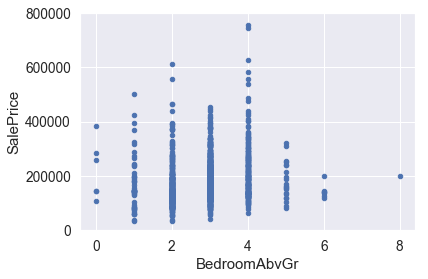

In [190]:
# Numb of Bedrooms
var = 'BedroomAbvGr'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
#sns.relplot(x=var, y='SalePrice', data = data)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000)) # Instead of SNS

(-0.5, 9.5, 0, 800000)

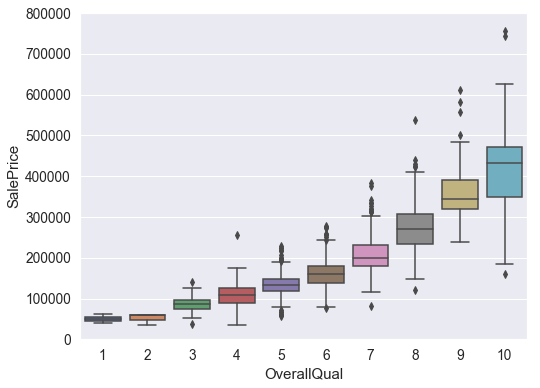

In [191]:
# Overall Quality
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x=var, y='SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)

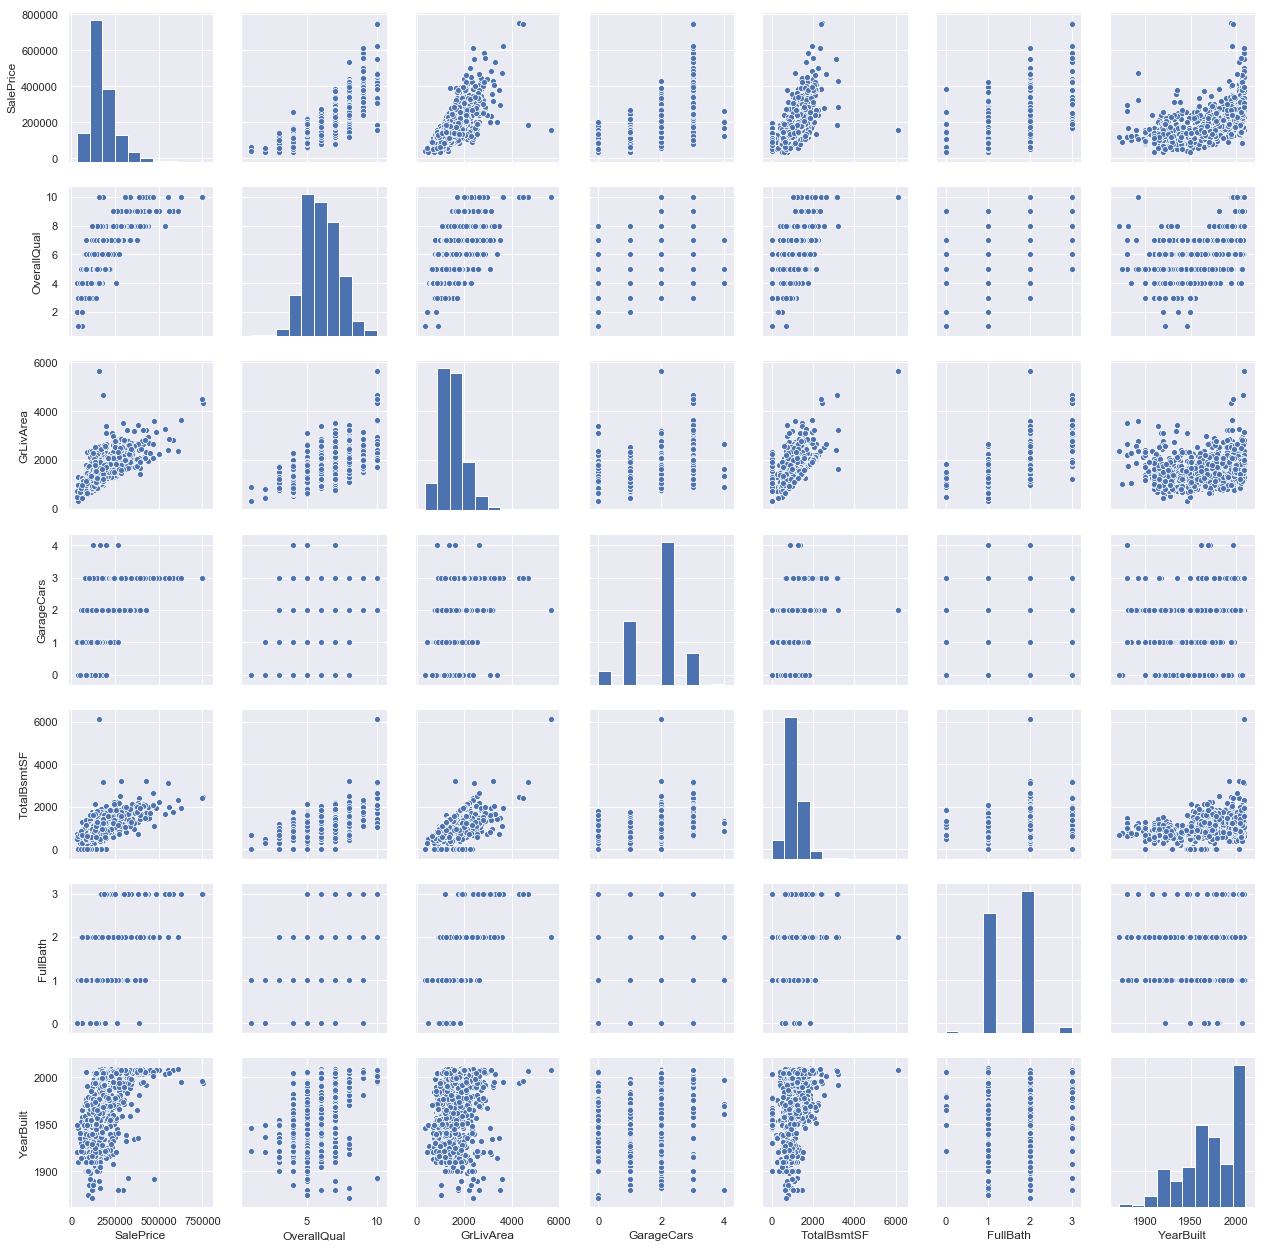

In [192]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

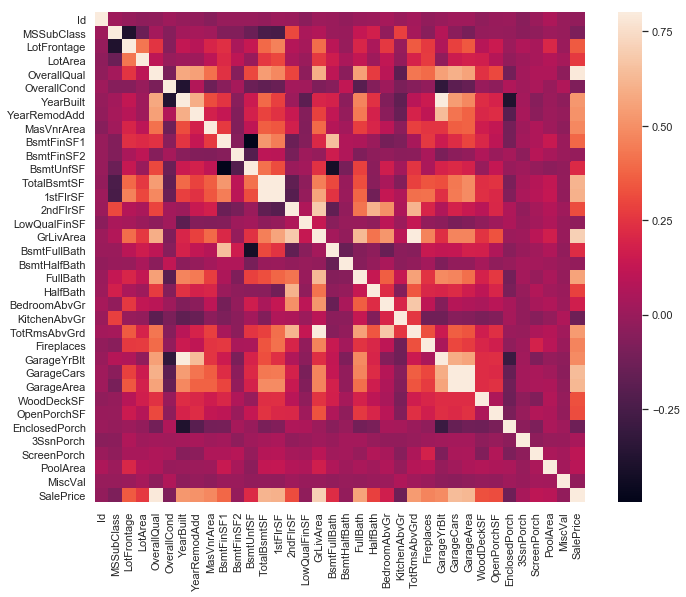

In [193]:
# Correlation Matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)

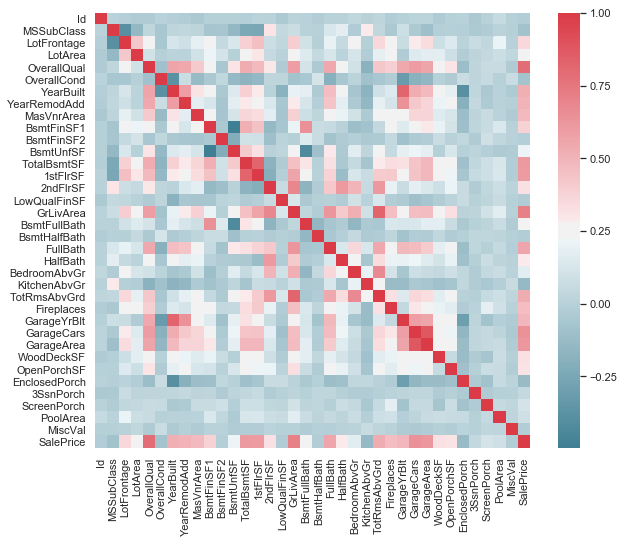

In [194]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

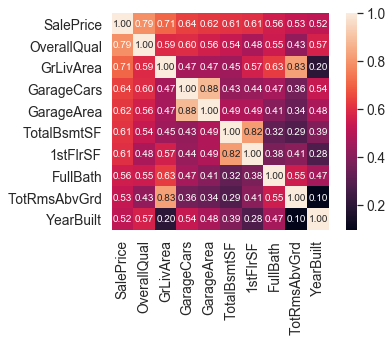

In [195]:
#saleprice correlation matrix#salepri 
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Missing Values Treatment

In [196]:
print(train.isnull().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

### None of our variables are missing

In [208]:
from sklearn.model_selection import train_test_split

In [220]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
train_dropped = train[cols]
train_dropped = train_dropped.drop('SalePrice', axis = 1).values
y = train['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(train_dropped, y, test_size = 0.3, random_state=21)
X_train.shape

(1022, 6)

## Linear Model

In [223]:
from sklearn import linear_model

In [224]:
lm = linear_model.LinearRegression()
# Fit the regressor to the training data
lm.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = lm.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(lm.score(X_test, y_test)))
rmse = np.sqrt(MSE(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6202822447234577
Root Mean Squared Error: 48641.35367512615


## Decision Tree

In [225]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [226]:
dt = DecisionTreeRegressor(max_depth=4,
                            min_samples_leaf=0.1, # Each leaf must contain AT LEAST 10% of the training data
                            random_state=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("R^2: {}".format(dt.score(X_test, y_test)))
mse_dt = MSE(y_test, y_pred) # Compute test MSE
rmse_dt = mse_dt **(1/2) # Compute test RMSE
print(rmse_dt)

R^2: 0.6653335730630899
45664.76991802249


## Random Forrest

In [227]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
rf_preds = forest_model.predict(X_test)
print("R^2: {}".format(forest_model.score(X_test, y_test)))
mse_rf = MSE(y_test, rf_preds) # Compute test MSE
rmse_rf = mse_rf **(1/2) # Compute test RMSE
print(rmse_rf)

R^2: 0.678353074028437
44767.71240763781


# Let's run the RF regression on the actual TEST set and upload

In [228]:
test = pd.read_csv('/Users/Mitch/Documents/DATA SCIENCE/Self Learning Not School/KaggleData/Housing/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [229]:
# Use the actual Test df using the same variables as Training
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
test_ready = test[cols]
test_ready.shape

(1459, 6)

In [230]:
# Check MiSSING!
print(test_ready.isnull().sum().sort_values(ascending=False))

TotalBsmtSF    1
GarageCars     1
YearBuilt      0
FullBath       0
GrLivArea      0
OverallQual    0
dtype: int64


In [231]:
# Which TotalBsmtSF is Nan???
print(test_ready[test_ready.TotalBsmtSF.isnull() == True])

     OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  YearBuilt
660            4        896         1.0          NaN         1       1946


In [232]:
print(test_ready['TotalBsmtSF'].mean())

1046.1179698216736


In [233]:
print(test_ready.TotalBsmtSF[660])

nan


In [234]:
test_ready.TotalBsmtSF[660] = 1046

In [235]:
# Which GarageCars is Nan???
print(test_ready[test_ready.GarageCars.isnull() == True])

      OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  YearBuilt
1116            5       1828         NaN        859.0         2       1923


In [236]:
from scipy.stats import mode

In [237]:
mode(test_ready['GarageCars']).mode[0]

2.0

In [238]:
test_ready['GarageCars'].fillna(2, inplace=True)

In [239]:
# Check MiSSING again!
print(test_ready.isnull().sum().sort_values(ascending=False))

YearBuilt      0
FullBath       0
TotalBsmtSF    0
GarageCars     0
GrLivArea      0
OverallQual    0
dtype: int64


In [240]:
rf_pred_REAL = forest_model.predict(test_ready)
print(rf_pred_REAL)

[110666.66666667 142150.         172324.4        ... 131070.
 115185.         241537.        ]


# SUBMISSION FOR TEST!!!

In [242]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': rf_pred_REAL})
# you could use any filename. We choose submission here
my_submission.to_csv('/Users/Mitch/Documents/DATA SCIENCE/Self Learning Not School/KaggleData/Housing/submission1.csv', index=False)